<a href="https://colab.research.google.com/github/shubham404-error/ethereum-price-prediction/blob/main/Ethereum_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
url = 'https://raw.githubusercontent.com/shubham404-error/ethereum-price-prediction/main/ETH-USD.csv'
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,12/19/2020,654.624207,668.769592,646.616211,659.297913,12830893778,659.297913
1,12/20/2020,659.185059,659.923706,625.014465,638.290833,13375855442,638.290833
2,12/21/2020,638.315186,646.846558,600.836060,609.817871,14419493621,609.817871
3,12/22/2020,609.420532,635.076599,589.552002,634.854187,14745890080,634.854187
4,12/23/2020,634.824585,637.122803,560.364258,583.714600,15261413038,583.714600
...,...,...,...,...,...,...,...
361,12/15/2021,3862.251465,4086.372803,3664.719971,4018.388672,26411188833,4018.388672
362,12/16/2021,4020.415039,4110.368652,3956.057129,3962.469727,19825531254,3962.469727
363,12/17/2021,3959.012451,3992.792480,3711.424561,3879.486572,23143541098,3879.486572
364,12/18/2021,3880.291504,3993.829834,3774.614990,3960.860107,19530895889,3960.860107


In [3]:
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Volume,Adj Close
2020-12-19,12/19/2020,654.624207,668.769592,646.616211,659.297913,12830893778,659.297913
2020-12-20,12/20/2020,659.185059,659.923706,625.014465,638.290833,13375855442,638.290833
2020-12-21,12/21/2020,638.315186,646.846558,600.836060,609.817871,14419493621,609.817871
2020-12-22,12/22/2020,609.420532,635.076599,589.552002,634.854187,14745890080,634.854187
2020-12-23,12/23/2020,634.824585,637.122803,560.364258,583.714600,15261413038,583.714600
...,...,...,...,...,...,...,...
2021-12-15,12/15/2021,3862.251465,4086.372803,3664.719971,4018.388672,26411188833,4018.388672
2021-12-16,12/16/2021,4020.415039,4110.368652,3956.057129,3962.469727,19825531254,3962.469727
2021-12-17,12/17/2021,3959.012451,3992.792480,3711.424561,3879.486572,23143541098,3879.486572
2021-12-18,12/18/2021,3880.291504,3993.829834,3774.614990,3960.860107,19530895889,3960.860107


In [4]:
future_days = 5

df[str(future_days)+'_Day_price_forecast'] = df[['Close']].shift(-future_days)
df[['Close',str(future_days)+'_Day_price_forecast']]

,Close,5_Day_price_forecast
2020-12-19,659.297913,611.607178
2020-12-20,638.290833,626.410706
2020-12-21,609.817871,635.835815
2020-12-22,634.854187,682.642334
2020-12-23,583.714600,730.397339
...,...,...
2021-12-15,4018.388672,NaN
2021-12-16,3962.469727,NaN
2021-12-17,3879.486572,NaN
2021-12-18,3960.860107,NaN


In [5]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[ 659.297913]
 [ 638.290833]
 [ 609.817871]
 [ 634.854187]
 [ 583.7146  ]
 [ 611.607178]
 [ 626.410706]
 [ 635.835815]
 [ 682.642334]
 [ 730.397339]
 [ 731.520142]
 [ 751.618958]
 [ 737.803406]
 [ 730.367554]
 [ 774.534973]
 [ 975.50769 ]
 [1040.233032]
 [1100.006104]
 [1207.112183]
 [1225.678101]
 [1224.197144]
 [1281.077271]
 [1262.246704]
 [1090.145386]
 [1043.43457 ]
 [1130.73938 ]
 [1218.453003]
 [1171.834595]
 [1233.537598]
 [1230.172241]
 [1257.279541]
 [1377.295898]
 [1382.274048]
 [1121.570923]
 [1236.512207]
 [1230.990601]
 [1391.609375]
 [1324.414795]
 [1357.058105]
 [1253.187134]
 [1298.101807]
 [1382.522827]
 [1376.115479]
 [1314.986206]
 [1369.040527]
 [1515.193726]
 [1660.909546]
 [1594.762695]
 [1718.650879]
 [1677.846802]
 [1614.227783]
 [1746.616821]
 [1768.035034]
 [1744.243408]
 [1783.797974]
 [1843.532593]
 [1814.109863]
 [1805.084106]
 [1779.791016]
 [1781.067505]
 [1848.458252]
 [1937.449219]
 [1960.164795]
 [1919.534058]
 [1935.601074]
 [1781.99292 ]
 [1570.203

In [6]:
y = np.array(df[str(future_days)+'_Day_price_forecast'])
y = y[:-future_days]
print(y)

[ 611.607178  626.410706  635.835815  682.642334  730.397339  731.520142
  751.618958  737.803406  730.367554  774.534973  975.50769  1040.233032
 1100.006104 1207.112183 1225.678101 1224.197144 1281.077271 1262.246704
 1090.145386 1043.43457  1130.73938  1218.453003 1171.834595 1233.537598
 1230.172241 1257.279541 1377.295898 1382.274048 1121.570923 1236.512207
 1230.990601 1391.609375 1324.414795 1357.058105 1253.187134 1298.101807
 1382.522827 1376.115479 1314.986206 1369.040527 1515.193726 1660.909546
 1594.762695 1718.650879 1677.846802 1614.227783 1746.616821 1768.035034
 1744.243408 1783.797974 1843.532593 1814.109863 1805.084106 1779.791016
 1781.067505 1848.458252 1937.449219 1960.164795 1919.534058 1935.601074
 1781.99292  1570.203979 1626.575684 1475.703735 1446.033691 1459.973145
 1416.04895  1564.707642 1492.608765 1575.853149 1541.914307 1533.275024
 1654.741577 1723.153809 1834.727905 1868.048828 1799.16626  1826.194946
 1772.102417 1924.685425 1854.564331 1791.702271 18

In [7]:
#split data
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.svm import SVR 
svr_rbf=SVR(kernel="rbf",C=1e3,gamma=0.00001)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [9]:
svr_rbf_confidence= svr_rbf.score(X_test,y_test)
print('svr_rbf accuracy :', svr_rbf_confidence)


svr_rbf accuracy : 0.8924467651981554


In [10]:
SVM_prediction=svr_rbf.predict(X_test)
print(SVM_prediction)

[3909.34187967  796.65892885 2901.45280909 3540.02720401 1831.62241269
 1960.39571436 2191.05702132 3224.35868411 1588.02054674 1840.99739076
 3970.00990882 3160.3611211  1257.75316582 4453.43978797 3956.84741894
 3395.20089798 1778.13546624 1730.23907292 1816.84583348 3893.23479413
 3428.09010357 1418.14296224 2789.88720006 2574.6449459  3225.49738617
 1288.63261007 3431.51856144 1988.52794495 1349.69196174 3430.26887698
 3575.41960357 3280.38452404 3510.59910759 3527.76651438 3342.05189955
 3618.5401224  3241.33251739 2467.10936555 3535.38811428  807.99022924
 2206.9980432  2129.07972028 1813.22433843 4248.66740623 4336.54579066
 2085.32144987 4133.23843871 2440.93093496 2327.0242525  1934.8550467
 4213.60082404 2144.1040243  2219.93354497 3404.12360083 2172.66161691
 2521.81147128 4144.51910667 3243.56072211 4178.36884286 1782.17395163
 2761.92636456 1846.49000236 2541.82058875 2595.05026956 4434.511999
 2096.46177407  716.21877433 2574.47351368 1465.40837662 3231.87950543
 3417.442

In [11]:
print(y_test)

[3970.181885  975.50769  2706.628906 3786.01416  1788.217041 2107.887207
 2519.116211 3156.509521 1575.853149 1593.413452 3270.278076 2714.945313
 1090.145386 4298.306641 4018.388672 2109.579834 1564.707642 1868.048828
 2191.373779 4054.322754 3862.634766 1314.986206 3431.086182 2364.751709
 3265.443359 1171.834595 3902.647705 1895.552124 1718.650879 3329.447998
 3748.760254 3928.844727 3830.38208  3606.20166  3244.40332  2784.294189
 3319.257324 2036.721069 2764.431152 1100.006104 2315.161865 2435.10498
 1459.973145 4294.453613 4636.174316 2298.333496 4119.815918 2237.136963
 2536.209961 2025.202759 4439.35791  2299.187744 2321.724121 3587.974854
 2157.656982 2367.663574 4288.074219 3518.518555 3587.506104 1826.194946
 2633.518311 1691.333984 1874.950073 2952.056152 4358.737305 1898.825195
  682.642334 2888.69873  1660.909546 3484.729004 3398.538818 4325.650391
 1225.678101]


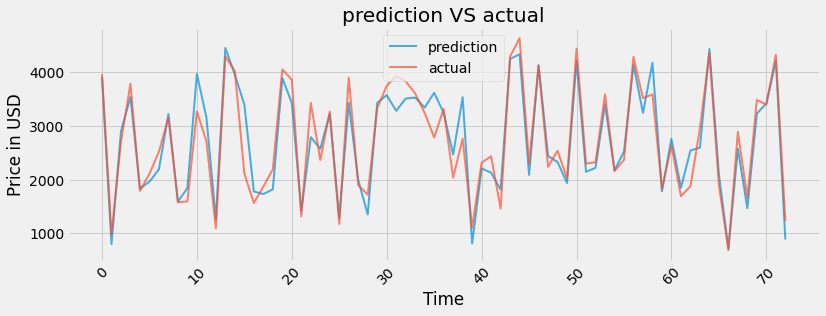

In [12]:
plt.figure(figsize=(12,4))
plt.plot(SVM_prediction,label='prediction',lw=2,alpha=.7)
plt.plot(y_test,label='actual',lw=2,alpha=.7)
plt.title('prediction VS actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()